In [1]:
import ROOT as rt
rt.gStyle.SetOptStat(0)

c = rt.TCanvas('c','', 800, 600)
c.SetLeftMargin(0.15)
c.SetRightMargin(0.05)
c.SetBottomMargin(0.13)
c.SetTopMargin(0.05)

Welcome to JupyROOT 6.28/02


In [8]:
dpmjet_infile = rt.TFile("root_out/old.root")
# dpmjet_infile = rt.TFile("output/epos_17f2a_fast.root")
phsd_infile = rt.TFile("root_out/out1.root")

dpmjet_indist = dpmjet_infile.Get("fLambdaFromSigmaDist_MC_no_eta_cut")
phsd_indist = phsd_infile.Get("fLambdaFromSigmaDist_MC_no_eta_cut")
# dpmjet_indist = dpmjet_inlist.FindObject("fTriggerDist_MC_no_eta_cut")
# phsd_indist = phsd_infile.Get("fTriggerDist_MC_no_eta_cut")

In [9]:
# dpmjet_indist.GetAxis(0).SetRangeUser(1.5, 4 - 0.0001)
dpmjet_eta_dist = dpmjet_indist.Projection(2).Clone("dpmjet_eta_dist")
# dpmjet_eta_dist.GetXaxis().SetRangeUser(-2.0, 2.0 - 0.0001)
dpmjet_eta_dist.Scale(1.0 / dpmjet_eta_dist.Integral())

# phsd_indist.GetAxis(0).SetRangeUser(1.5, 4 - 0.0001)
phsd_eta_dist = phsd_indist.Projection(2).Clone("phsd_eta_dist")
# phsd_eta_dist.GetXaxis().SetRangeUser(-2.0, 2.0 - 0.0001)
phsd_eta_dist.Scale(1.0 / phsd_eta_dist.Integral())

# phsd_indist.GetAxis(0).SetRangeUser(1.5, 4 - 0.0001)
# phsd_eta_dist = phsd_indist.Projection(2).Clone("phsd_eta_dist")
# phsd_eta_dist.GetXaxis().SetRangeUser(-2.0, 2.0 - 0.0001)
# phsd_eta_dist.Scale(1.0 / phsd_eta_dist.Integral())


Warning in <TFile::Append>: Replacing existing TH1: fLambdaFromSigmaDist_MC_no_eta_cut_proj_2 (Potential memory leak).


Info in <TCanvas::Print>: pdf file eta_comp_lambda_zoomed.pdf has been created


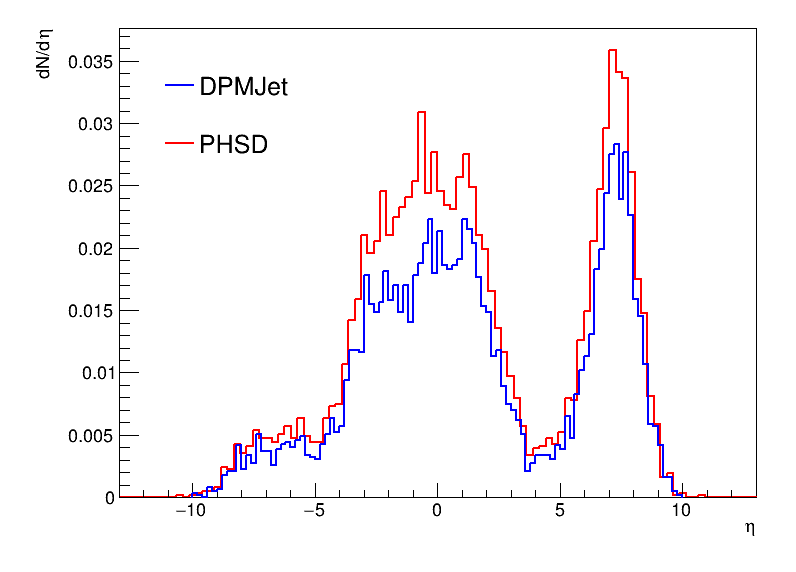

In [10]:
dpmjet_eta_dist.SetLineColor(rt.kBlue)
dpmjet_eta_dist.SetLineWidth(2)

phsd_eta_dist.SetLineColor(rt.kRed)
phsd_eta_dist.SetLineWidth(2)

dpmjet_eta_dist.SetTitle("")
dpmjet_eta_dist.GetXaxis().SetTitle("#eta")
dpmjet_eta_dist.GetYaxis().SetTitle("dN/d#eta")

phsd_eta_dist.SetTitle("")
phsd_eta_dist.GetXaxis().SetTitle("#eta")
phsd_eta_dist.GetYaxis().SetTitle("dN/d#eta")

phsd_eta_dist.Draw("hist")
# phsd_eta_dist2.Draw("hist same")
dpmjet_eta_dist.Draw("hist same")


legend = rt.TLegend(0.2, 0.7, 0.4, 0.9)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.AddEntry(dpmjet_eta_dist, "DPMJet", "l")
legend.AddEntry(phsd_eta_dist, "PHSD", "l")
legend.Draw()
c.Draw()
c.SaveAs("eta_comp_lambda_zoomed.pdf")